In [2]:
from validation.FullExperimental import FullExperimental
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = FullExperimental()
df.rename(columns={"v [X,SX,Y,SY]": "delta"}, inplace=True)

# database
layers = df["layers"].values
layers[0] = ["Y","Y"]
df["layers"] = layers

# df = df.iloc[1:]

df.round(3)

Et [GPa]        Eb [GPa]        t [mm]         b [mm]         \
         mean    std     mean    std   mean    std    mean    std   
Name                                                                
TFP1    2.886  0.227   13.201  0.631  5.267  0.058  25.600  0.100   
TFP2    2.259  0.066    9.870  0.780  4.700  0.000  25.567  0.058   
TFP3    2.000  0.004    9.222  0.496  4.833  0.058  25.400  0.173   
TFP4    2.451  0.114   10.182  0.771  4.700  0.000  25.667  0.153   
TFP5    1.627  0.120    6.143  0.162  5.700  0.000  25.167  0.153   
TFP6    1.740  0.068    7.798  0.334  5.600  0.000  25.033  0.635   

           layers     Vc  
                          
Name                      
TFP1       [Y, Y]  0.178  
TFP2       [Y, X]  0.164  
TFP3      [Y, SX]  0.135  
TFP4      [Y, SY]  0.144  
TFP5  [Y, SX, SY]  0.146  
TFP6   [Y, X, SY]  0.180

In [4]:
df_old = df.copy()

df_Et = df["Et [GPa]"]["mean"]
df_Eb = df["Eb [GPa]"]["mean"]
df_t = df["t [mm]"]["mean"]
df_b = df["b [mm]"]["mean"]

df = df.drop(columns=["Et [GPa]", "Eb [GPa]", "t [mm]", "b [mm]"],level=0)
df["Et [GPa]"] = df_Et
df["Eb [GPa]"] = df_Eb
df["t [mm]"] = df_t
df["b [mm]"] = df_b
df


,layers,Vc,Et [GPa],Eb [GPa],t [mm],b [mm]
,,,,,,
Name,,,,,,
TFP1,"[Y, Y]",0.178,2.885509,13.201050,5.266667,25.600000
TFP2,"[Y, X]",0.164,2.258503,9.869501,4.700000,25.566667
TFP3,"[Y, SX]",0.135,2.000437,9.222003,4.833333,25.400000
TFP4,"[Y, SY]",0.144,2.451362,10.181815,4.700000,25.666667
TFP5,"[Y, SX, SY]",0.146,1.626582,6.143105,5.700000,25.166667
TFP6,"[Y, X, SY]",0.180,1.739870,7.798060,5.600000,25.033333


### Experimental Data

In [5]:
df_old

Et [GPa]             Eb [GPa]              t [mm]               b [mm]  \
          mean       std       mean       std      mean       std       mean   
Name                                                                           
TFP1  2.885509  0.227295  13.201050  0.630858  5.266667  0.057735  25.600000   
TFP2  2.258503  0.065626   9.869501  0.780113  4.700000  0.000000  25.566667   
TFP3  2.000437  0.004435   9.222003  0.495965  4.833333  0.057735  25.400000   
TFP4  2.451362  0.114353  10.181815  0.770635  4.700000  0.000000  25.666667   
TFP5  1.626582  0.120272   6.143105  0.161637  5.700000  0.000000  25.166667   
TFP6  1.739870  0.067515   7.798060  0.334186  5.600000  0.000000  25.033333   

                     layers     Vc  
           std                      
Name                                
TFP1  0.100000       [Y, Y]  0.178  
TFP2  0.057735       [Y, X]  0.164  
TFP3  0.173205      [Y, SX]  0.135  
TFP4  0.152753      [Y, SY]  0.144  
TFP5  0.152753  [Y, SX, SY]  0.146  
TFP6  0.635085   [Y, X, SY]  0.180

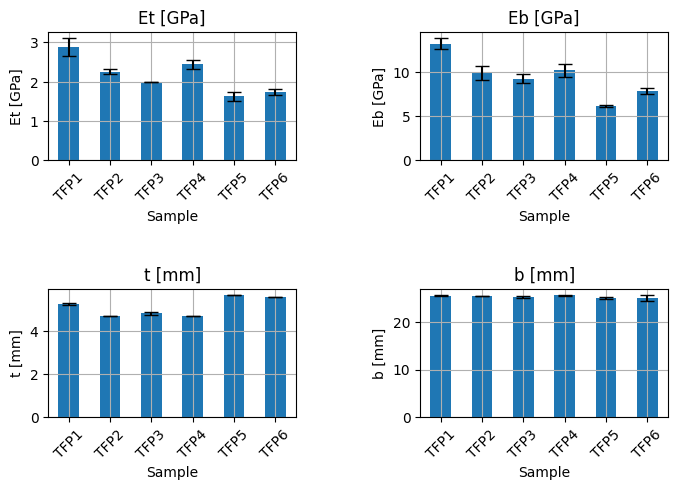

In [6]:
# bar plot 
# subplot 

# plot with error bars

fig = plt.figure()
#size 
fig.set_size_inches(8, 5)
# subplot padding
fig.subplots_adjust(hspace=1., wspace=0.5)
cols = ["Et [GPa]", "Eb [GPa]", "t [mm]", "b [mm]"]

for i, col in enumerate(cols):
    ax = fig.add_subplot(2, 2, i+1)
    df_old[col]["mean"].plot(kind='bar', yerr=df_old[col]["std"], capsize=5, ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")
    plt.grid()
    # rot label 45
    plt.xticks(rotation=45)

#### 1. Thickness Model
$$ \Tau (t_n,t_l,n_i) = t_n + 2t_l n_i $$
#### 2. Tensile Model

$$ \mathcal{E}_t(E_n,\vec{E_l},t_n,t_l, \mathcal{C}) = 
    \frac{E_n t_n + 2t_l \  ( \vec{\delta} \cdot \vec{E_l})}{t_t} $$
where: 
- $t_t = \Tau(t_n,t_l,n_i)$
- $n_i$ is the number of layers.
- $\delta = \mathcal{F}(\mathcal{C})$ is the function of the # of layers of each type.

#### 3. Bending Model
$$ \mathcal{E}_b(E_n,\vec{E_l},t_n,t_l) = 
\frac{E_n I_n + 2 \  (\vec{I_l} \cdot \vec{E_l})}{I_t} $$


In [7]:
from AnalyticalLayers.models import Tau_model,E_flexion,E_Tensile,Fraction_Carbon

In [8]:
# Given tn,tl,En,El 
tn = 1.0
tl = 1.0
En = 1
El = np.array([1.0, 2.0, 3.0,4.0]) #  [ E_X , E_SX , EY , E_SY ]

In [9]:
# Add column to df Thickness Model Prediction 
radius = 0.29

ni = df["layers"].apply(len)
t_p = Tau_model(tn, tl, ni)
Et_p =  [E_Tensile(En, El, tn, tl, ilayer ) for ilayer in df["layers"]]
Eb_p =  [E_flexion(En, El, tn, tl, ilayer ) for ilayer in df["layers"]]
V_c = [ Fraction_Carbon(radius,tn,tl,ilayer) for ilayer in df["layers"]]
pred_df = pd.DataFrame({
    "t p [mm]"  : t_p,
    "Et p [GPa]": Et_p,
    "Eb p [GPa]": Eb_p,
    "Vc"       : V_c
})

error_df = pd.DataFrame({
    "t [mm]"  : 100*abs(df["t [mm]"]   - t_p )/df["t [mm]"]  ,
    "Et [GPa]": 100*abs(df["Et [GPa]"] - Et_p)/df["Et [GPa]"],
    "Eb [GPa]": 100*abs(df["Eb [GPa]"] - Eb_p)/df["Eb [GPa]"],
    "Vc"     : 100*abs(df["Vc"]      - V_c )/df["Vc"]
})
error_df

,t [mm],Et [GPa],Eb [GPa],Vc
Name,,,,
TFP1,5.063291,9.894587,77.395738,16.878400
TFP2,6.382979,20.301175,85.652770,9.782654
TFP3,3.448276,9.975994,76.144012,13.887782
TFP4,6.382979,22.380958,62.992847,19.269795
TFP5,22.807018,66.870483,45.564611,22.443853
TFP6,25.000000,39.583505,60.781155,24.512017


In [10]:
df.round(2)

,layers,Vc,Et [GPa],Eb [GPa],t [mm],b [mm]
,,,,,,
Name,,,,,,
TFP1,"[Y, Y]",0.18,2.89,13.20,5.27,25.60
TFP2,"[Y, X]",0.16,2.26,9.87,4.70,25.57
TFP3,"[Y, SX]",0.14,2.00,9.22,4.83,25.40
TFP4,"[Y, SY]",0.14,2.45,10.18,4.70,25.67
TFP5,"[Y, SX, SY]",0.15,1.63,6.14,5.70,25.17
TFP6,"[Y, X, SY]",0.18,1.74,7.80,5.60,25.03


In [11]:
theta = lambda x: 0.5 + 0.5*np.tanh(100*x)
relu  = lambda x: x*theta(x)

In [12]:
ni

Name
TFP1    2
TFP2    2
TFP3    2
TFP4    2
TFP5    3
TFP6    3
Name: layers, dtype: int64

In [13]:

import scipy.optimize as opt
from optim.objetive_tfree import objetive
from validation.experimental import manual_data

t_nucleo_exp = manual_data()["t_nucleo [mm]"]
def f(x):
    r  = x[0]
    tn = x[1]
    tl = x[2:6]
    En = x[6]
    El = x[7:]
    
    return objetive(r,tn, tl, En, El,df)

r_0  = 3.5
nu_0 = 0.3
tn_0 = 3.0
tl_0 = [0.5,0.5,0.5,0.5]
En_0 = 5.0
El_0 = [5,5,5,5]

x0 = [r_0,tn_0, *tl_0, En_0, *El_0]


eps = 1e-3

tn_limits = [0.8*t_nucleo_exp,
             1.1*t_nucleo_exp]

bounds = [ 
            (0.2,0.4),  # radius
            tn_limits,  # tn
           (0.25,0.7),  # tl
           (0.25,0.7),  # tl
           (0.25,0.7),  # tl
           (0.25,0.7),  # tl
           (eps,None),  # En
           (eps,None),  # El[0] E_X
           (eps,None),  # El[1] E_SX
           (eps,None),  # El[2] E_Y # [eps,None] or [10,30]
           (eps,None)   # El[3] E_SY
           ]  

res = opt.basinhopping(f, x0, niter=10, 
                       minimizer_kwargs={"bounds":bounds, 
                                         "method":"Nelder-Mead"})

c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\.conda\Lib\site-packages\scipy\optimize\_basinhopping.py:302: OptimizeWarning: Initial guess is not within the specified bounds
  return self.minimizer(self.func, x0, **self.kwargs)


In [14]:
print("tn in = ",tn_limits)

tn in =  [2.2352000000000003, 3.0734000000000004]


In [15]:
xopt = res.x
r_opt  = xopt[0]
tn_opt = xopt[1]
tl_opt = xopt[2:6]
En_opt = xopt[6]
El_opt = xopt[7:]

df_pred,error_df = objetive(r_opt,tn_opt, tl_opt, En_opt, El_opt, df,give_pred=True)

In [16]:
error_df

,t [%],Et [%],Eb [%],Vc [%]
Name,,,,
TFP1,22.400519,23.492682,37.464785,6.219031
TFP2,13.185256,3.781342,48.896492,1.951629
TFP3,15.578083,5.612750,51.946522,2.689816
TFP4,13.163478,9.028062,53.441477,8.792354
TFP5,19.619326,40.058686,31.717902,9.273092
TFP6,18.185737,42.773063,40.664162,6.361457


In [17]:
# EX , ESX , EY , ESY

bounds_min = [ b[0] for b in bounds ]
bounds_max = [ b[1] for b in bounds ]

rows = ["r","tn", "tl_X", "tl_SX", "tl_Y", "tl_SY",
        "En", "EX", "ESX", "EY", "ESY"]
units = ["mm","mm", "mm", "mm", "mm", "mm",
         "GPa", "GPa", "GPa", "GPa", "GPa"]
df_opt = pd.DataFrame({"Variable": rows, "x": xopt, "unit": units, "x_min": bounds_min, "x_max": bounds_max})
df_opt.index = df_opt["Variable"]
df_opt.pop("Variable")
df_opt.round(5)


,x,unit,x_min,x_max
Variable,,,,
r,0.27849,mm,0.2000,0.4000
tn,3.07312,mm,2.2352,3.0734
tl_X,0.25014,mm,0.2500,0.7000
tl_SX,0.25019,mm,0.2500,0.7000
tl_Y,0.25345,mm,0.2500,0.7000
tl_SY,0.25065,mm,0.2500,0.7000
En,0.00179,GPa,0.0010,NaN
EX,4.55632,GPa,0.0010,NaN
ESX,2.67064,GPa,0.0010,NaN


In [18]:
error_df.round(2)

,t [%],Et [%],Eb [%],Vc [%]
Name,,,,
TFP1,22.40,23.49,37.46,6.22
TFP2,13.19,3.78,48.90,1.95
TFP3,15.58,5.61,51.95,2.69
TFP4,13.16,9.03,53.44,8.79
TFP5,19.62,40.06,31.72,9.27
TFP6,18.19,42.77,40.66,6.36


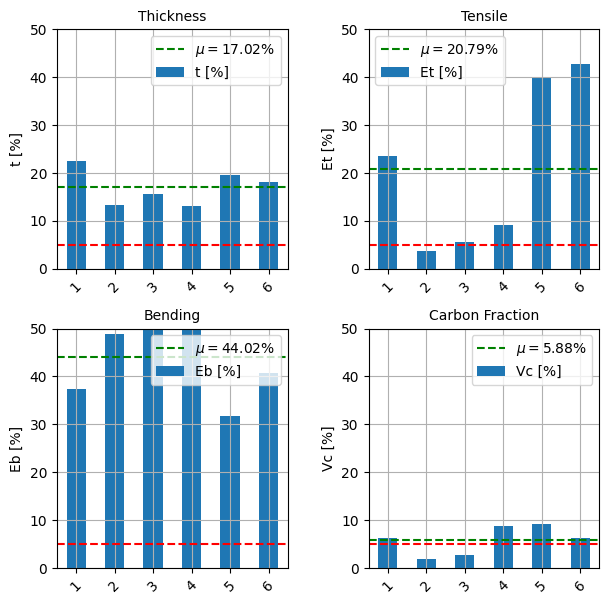

In [19]:
cols = error_df.columns

fig = plt.figure()
#padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)
fig.set_size_inches(7, 7)

names_title = ["Thickness", "Tensile", "Bending", "Carbon Fraction"]
for i, col in enumerate(cols):
    ax = fig.add_subplot(2, 2, i+1)
    error_df[col].plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")
    # line 5% 
    ax.axhline(5, color='r', linestyle='--')
    # line mean 
    error_df[col].mean()
    ax.axhline(error_df[col].mean(), color='g', linestyle='--', label=r"$\mu = $"+str(round(error_df[col].mean(),2)) + "%")
    # 0,50
    plt.ylim(0,50)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()

    plt.xticks(np.arange(len(df.index)), 1+np.arange(len(df.index)))
    plt.xlabel("")
    plt.title(names_title[i], fontsize=10)

In [23]:
cols

Index(['t [%]', 'Et [%]', 'Eb [%]', 'Vc [%]'], dtype='object')

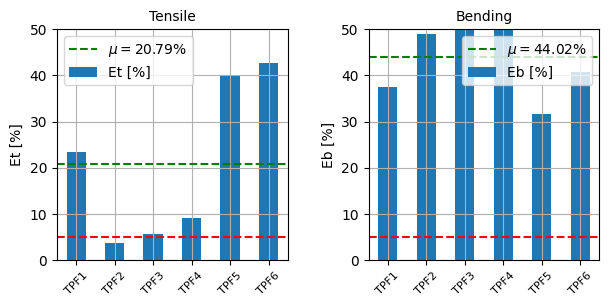

In [29]:
cols = error_df.columns[[1,2]]

fig = plt.figure()
#padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)
fig.set_size_inches(7, 3)

names_title = ["Tensile", "Bending"]
for i, col in enumerate(cols):
    ax = fig.add_subplot(1, 2, i+1)
    error_df[col].plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_ylabel(col)
    ax.set_xlabel("Sample")
    # line 5% 
    ax.axhline(5, color='r', linestyle='--')
    # line mean 
    error_df[col].mean()
    ax.axhline(error_df[col].mean(), color='g', linestyle='--', label=r"$\mu = $"+str(round(error_df[col].mean(),2)) + "%")
    # 0,50
    plt.ylim(0,50)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    names = ["TPF"+str(i) for i in range(1,len(df.index)+1)]

    plt.xticks(np.arange(len(df.index)), names, fontsize=8)
    plt.xlabel("")
    plt.title(names_title[i], fontsize=10)

In [ ]:
df

,layers,Vc,Et [GPa],Eb [GPa],t [mm],b [mm]
,,,,,,
Name,,,,,,
TFP1,"[Y, Y]",0.178,2.885509,13.201050,5.266667,25.600000
TFP2,"[Y, X]",0.164,2.258503,9.869501,4.700000,25.566667
TFP3,"[Y, SX]",0.135,2.000437,9.222003,4.833333,25.400000
TFP4,"[Y, SY]",0.144,2.451362,10.181815,4.700000,25.666667
TFP5,"[Y, SX, SY]",0.146,1.626582,6.143105,5.700000,25.166667
TFP6,"[Y, X, SY]",0.180,1.739870,7.798060,5.600000,25.033333


In [ ]:
df_pred

,t [mm],Et [GPa],Eb [GPa],Vc
0,4.086906,3.563393,8.255305,0.166930
1,4.080293,2.343904,5.043661,0.167201
2,4.080393,2.112716,4.431493,0.131369
3,4.081317,2.230051,4.740503,0.131339
4,4.581698,2.278170,4.194641,0.159539
5,4.581599,2.484066,4.627044,0.191451


In [ ]:
df

,layers,Vc,Et [GPa],Eb [GPa],t [mm],b [mm]
,,,,,,
Name,,,,,,
TFP1,"[Y, Y]",0.178,2.885509,13.201050,5.266667,25.600000
TFP2,"[Y, X]",0.164,2.258503,9.869501,4.700000,25.566667
TFP3,"[Y, SX]",0.135,2.000437,9.222003,4.833333,25.400000
TFP4,"[Y, SY]",0.144,2.451362,10.181815,4.700000,25.666667
TFP5,"[Y, SX, SY]",0.146,1.626582,6.143105,5.700000,25.166667
TFP6,"[Y, X, SY]",0.180,1.739870,7.798060,5.600000,25.033333


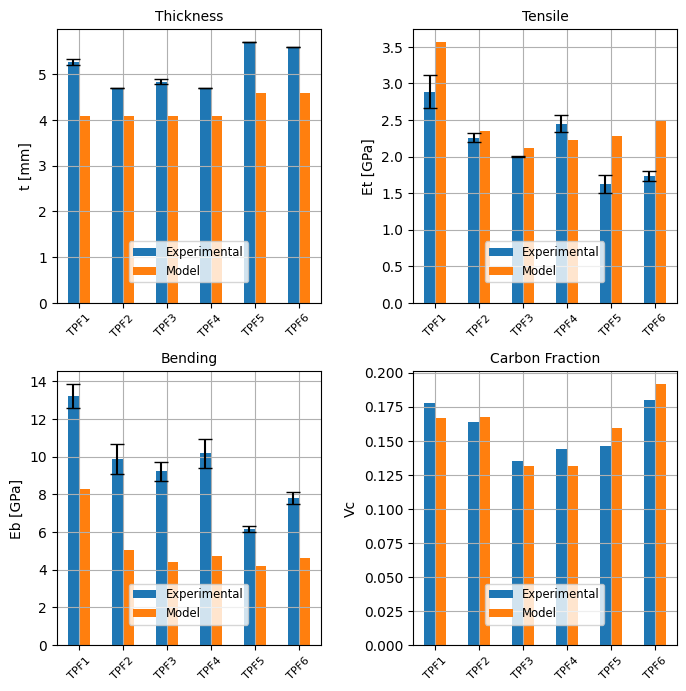

In [ ]:
# plot with error bars 
fig = plt.figure()
#size
fig.set_size_inches(8, 8)

# subplot padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)

cols = [ "t [mm]","Et [GPa]", "Eb [GPa]", "Vc"]

for i, col in enumerate(cols):

    names_leg = ["Experimental", "Model"]

    try:
        error = df_old[col]["std"]
        yerror = [error, np.nan*error]
    except:
        yerror = None
    # errror experimental
    
    df_pred[col].index = df[col].index
    pd.concat([ df[col], df_pred[col]], axis=1).plot(kind='bar', 
                                                     ax=fig.add_subplot(2, 2, i+1), capsize=5, yerr=yerror)
    plt.ylabel(col)
    # 45
    plt.xticks(rotation=45)
    # replace xticks by index
    names = ["TPF"+str(i) for i in range(1,len(df.index)+1)]
    plt.xticks(np.arange(len(df.index)), names,fontsize=8)
    plt.grid()
    # outside
    plt.legend(names_leg,loc='center left', bbox_to_anchor=(0.25, 0.15),fontsize='small')
    plt.title(names_title[i],fontsize=10)
    plt.xlabel("")
    

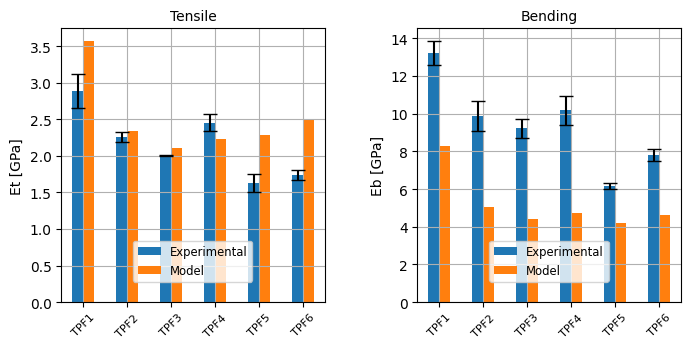

In [27]:
# plot with error bars 
fig = plt.figure()
#size
fig.set_size_inches(8, 8)

# subplot padding
fig.subplots_adjust(hspace=0.25, wspace=0.35)

cols = ["Et [GPa]", "Eb [GPa]"]

for i, col in enumerate(cols):

    names_leg = ["Experimental", "Model"]

    try:
        error = df_old[col]["std"]
        yerror = [error, np.nan*error]
    except:
        yerror = None
    # errror experimental
    
    df_pred[col].index = df[col].index
    pd.concat([ df[col], df_pred[col]], axis=1).plot(kind='bar', 
                                                     ax=fig.add_subplot(2, 2, i+1), capsize=5, yerr=yerror)
    plt.ylabel(col)
    # 45
    plt.xticks(rotation=45)
    # replace xticks by index
    names = ["TPF"+str(i) for i in range(1,len(df.index)+1)]
    plt.xticks(np.arange(len(df.index)), names,fontsize=8)
    plt.grid()
    # outside
    plt.legend(names_leg,loc='center left', bbox_to_anchor=(0.25, 0.15),fontsize='small')
    plt.title(names_title[i],fontsize=10)
    plt.xlabel("")
    